In [80]:
#Import package pandas for data analysis
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
import matplotlib.patches as mpatches
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
# Import seaborn for visualisation/plotting
import seaborn as sns

%matplotlib inline

# Read the trainning file
route46A = pd.read_csv('result_of_46A.csv')

# 1. Data Understanding and Cleaning

## 1.1 Data Overview

In [81]:
# Have an overview of the file
route46A.head()

,Unnamed: 0,arrive_time,clouds_all,day,dayofweek,dt,duration,end_point,humidity,month,pressure,start_point,temp,tripid,weather_description,wind_deg,wind_speed
0,0,64279,20.0,24,1,1464112279,148.0,808.0,67.0,5,1022.0,807,287.67,3044337.0,few clouds,80.0,6.0
1,1,64427,20.0,24,1,1464112427,112.0,809.0,67.0,5,1022.0,808,287.67,3044337.0,few clouds,80.0,6.0
2,2,64539,20.0,24,1,1464112539,126.0,810.0,67.0,5,1022.0,809,287.67,3044337.0,few clouds,80.0,6.0
3,3,64665,20.0,24,1,1464112665,75.0,811.0,67.0,5,1022.0,810,287.67,3044337.0,few clouds,80.0,6.0
4,4,64740,20.0,24,1,1464112740,41.0,812.0,67.0,5,1022.0,811,287.67,3044337.0,few clouds,80.0,6.0


In [82]:
route46A.shape

(715662, 17)

In [83]:
route46A.head()

,Unnamed: 0,arrive_time,clouds_all,day,dayofweek,dt,duration,end_point,humidity,month,pressure,start_point,temp,tripid,weather_description,wind_deg,wind_speed
0,0,64279,20.0,24,1,1464112279,148.0,808.0,67.0,5,1022.0,807,287.67,3044337.0,few clouds,80.0,6.0
1,1,64427,20.0,24,1,1464112427,112.0,809.0,67.0,5,1022.0,808,287.67,3044337.0,few clouds,80.0,6.0
2,2,64539,20.0,24,1,1464112539,126.0,810.0,67.0,5,1022.0,809,287.67,3044337.0,few clouds,80.0,6.0
3,3,64665,20.0,24,1,1464112665,75.0,811.0,67.0,5,1022.0,810,287.67,3044337.0,few clouds,80.0,6.0
4,4,64740,20.0,24,1,1464112740,41.0,812.0,67.0,5,1022.0,811,287.67,3044337.0,few clouds,80.0,6.0


In [84]:
route46A.drop(columns=['Unnamed: 0'], inplace=True)
route46A.dtypes

arrive_time              int64
clouds_all             float64
day                      int64
dayofweek                int64
dt                       int64
duration               float64
end_point              float64
humidity               float64
month                    int64
pressure               float64
start_point              int64
temp                   float64
tripid                 float64
weather_description     object
wind_deg               float64
wind_speed             float64
dtype: object

In [85]:
route46A['start_point'] = route46A['start_point'].astype('int')
route46A['end_point'] = route46A['end_point'].astype('int')
route46A.head()

,arrive_time,clouds_all,day,dayofweek,dt,duration,end_point,humidity,month,pressure,start_point,temp,tripid,weather_description,wind_deg,wind_speed
0,64279,20.0,24,1,1464112279,148.0,808,67.0,5,1022.0,807,287.67,3044337.0,few clouds,80.0,6.0
1,64427,20.0,24,1,1464112427,112.0,809,67.0,5,1022.0,808,287.67,3044337.0,few clouds,80.0,6.0
2,64539,20.0,24,1,1464112539,126.0,810,67.0,5,1022.0,809,287.67,3044337.0,few clouds,80.0,6.0
3,64665,20.0,24,1,1464112665,75.0,811,67.0,5,1022.0,810,287.67,3044337.0,few clouds,80.0,6.0
4,64740,20.0,24,1,1464112740,41.0,812,67.0,5,1022.0,811,287.67,3044337.0,few clouds,80.0,6.0


Here we think the categorical features are `day`,`weather_description`,`start_point`,`dayofweek` and `end_point`. Although some values of thses features are numerical, they are discrete rather than continuous.

The other features, including `temp`,`arrive_time`,`clouds_all`,`wind_speed`,`wind_deg`,`pressure`,`humidity`, all of them are numerical and continuous. So we think they belong to continuous feature

In [86]:
route46A['arrive_time'] = route46A['arrive_time'].divide(1800).round()
route46A['arrive_time'] = route46A['arrive_time'].astype('int')

# Select the continuous frature and categorical ferature
continuous = ['temp','clouds_all','wind_speed','wind_deg','pressure','humidity']
categorical = ['day','weather_description','start_point','dayofweek','end_point','arrive_time']

# Convert them to categorical
for col in categorical:
    route46A[col] = route46A[col].astype('category')

route46A.dtypes

arrive_time            category
clouds_all              float64
day                    category
dayofweek              category
dt                        int64
duration                float64
end_point              category
humidity                float64
month                     int64
pressure                float64
start_point            category
temp                    float64
tripid                  float64
weather_description    category
wind_deg                float64
wind_speed              float64
dtype: object

In [87]:
route46A.head()

,arrive_time,clouds_all,day,dayofweek,dt,duration,end_point,humidity,month,pressure,start_point,temp,tripid,weather_description,wind_deg,wind_speed
0,36,20.0,24,1,1464112279,148.0,808,67.0,5,1022.0,807,287.67,3044337.0,few clouds,80.0,6.0
1,36,20.0,24,1,1464112427,112.0,809,67.0,5,1022.0,808,287.67,3044337.0,few clouds,80.0,6.0
2,36,20.0,24,1,1464112539,126.0,810,67.0,5,1022.0,809,287.67,3044337.0,few clouds,80.0,6.0
3,36,20.0,24,1,1464112665,75.0,811,67.0,5,1022.0,810,287.67,3044337.0,few clouds,80.0,6.0
4,36,20.0,24,1,1464112740,41.0,812,67.0,5,1022.0,811,287.67,3044337.0,few clouds,80.0,6.0


In [88]:
route46A.select_dtypes(['category']).describe().T

,count,unique,top,freq
arrive_time,715662,38,36,26581
day,715662,31,1,26796
dayofweek,715662,7,2,120640
end_point,715662,58,7353,12339
start_point,715662,58,7353,12339
weather_description,715662,20,broken clouds,304897


## 1.2 Histograms for all continuous features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9662FE908>,
      dtype=object)

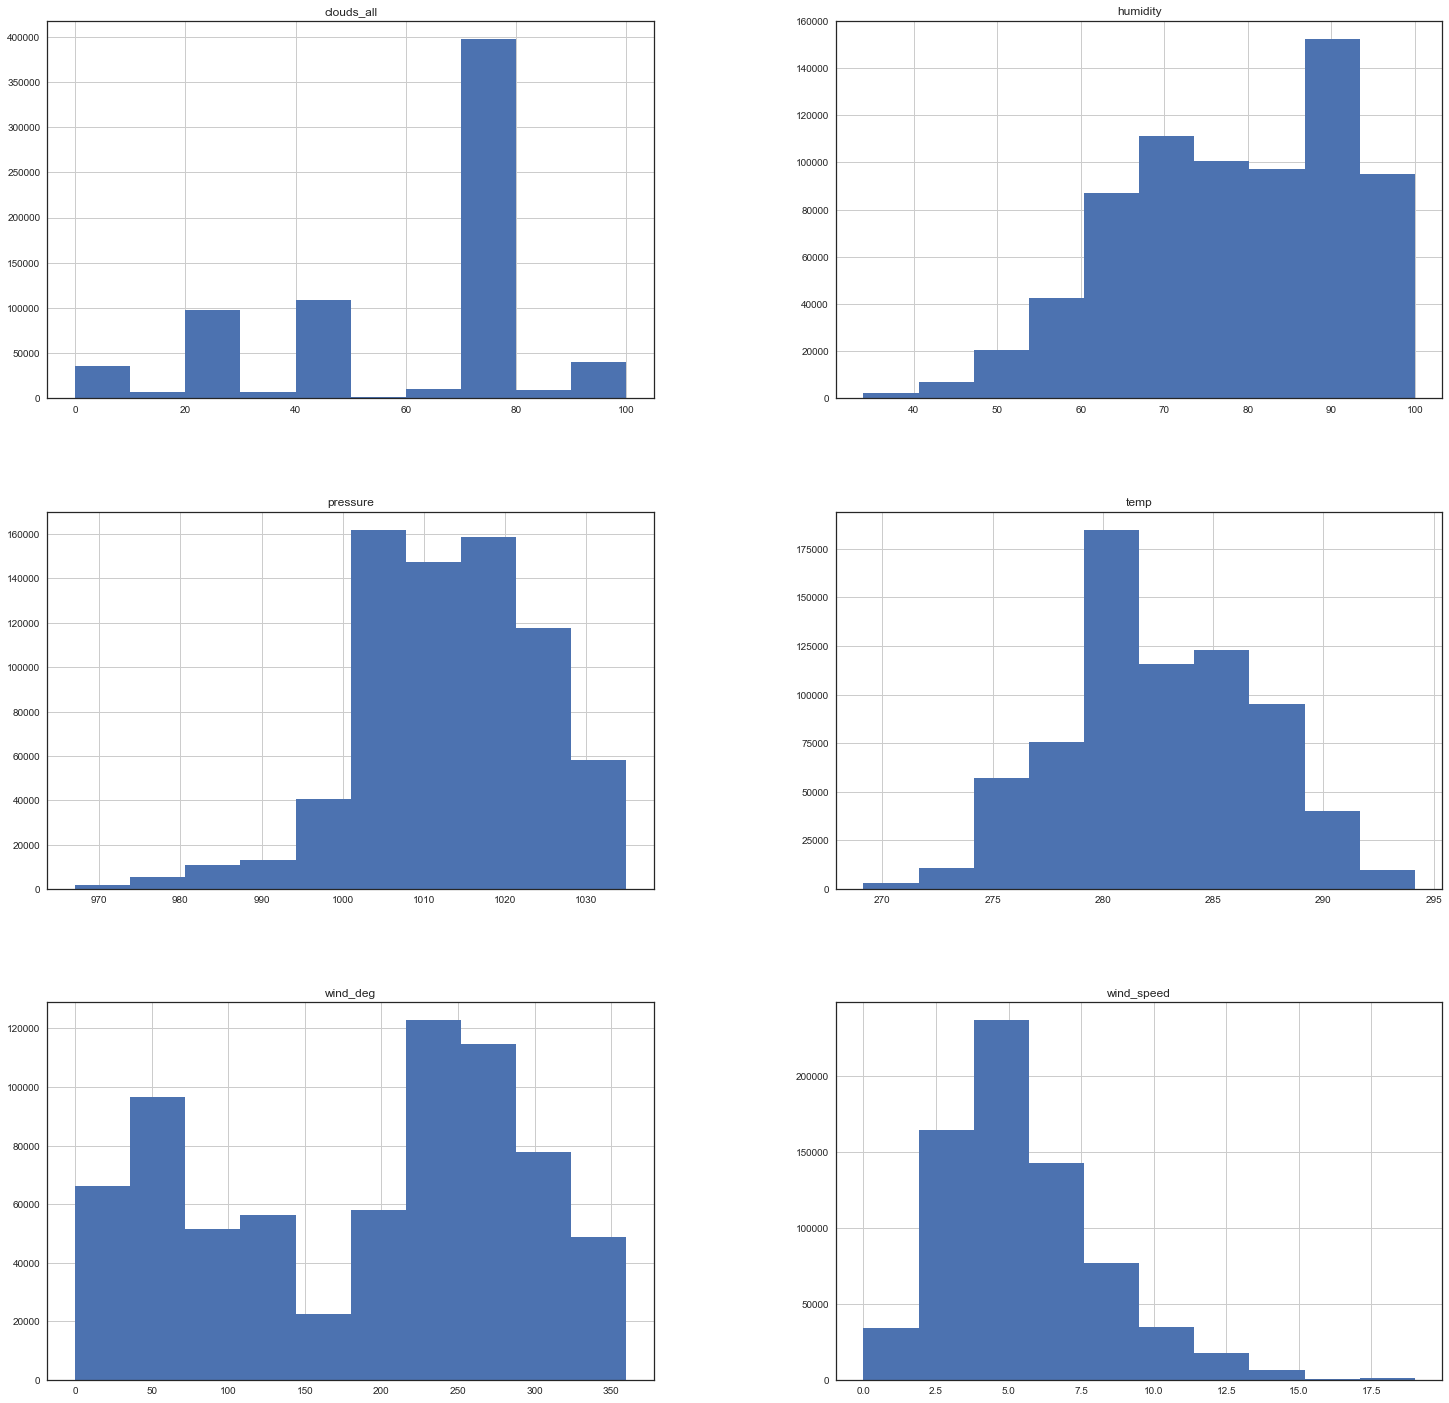

In [89]:
route46A[continuous].hist(figsize=(25,25))

## 1.2 Box plot for all continuous features

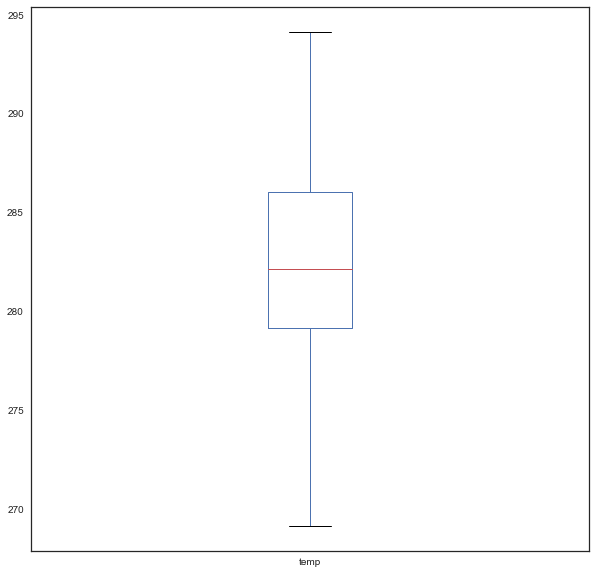

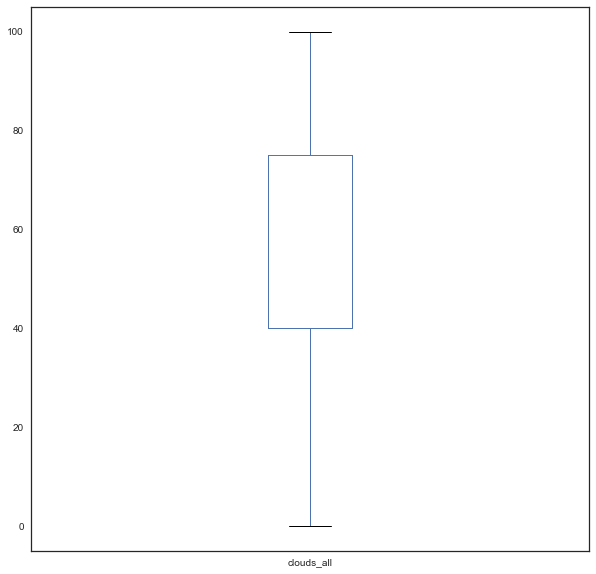

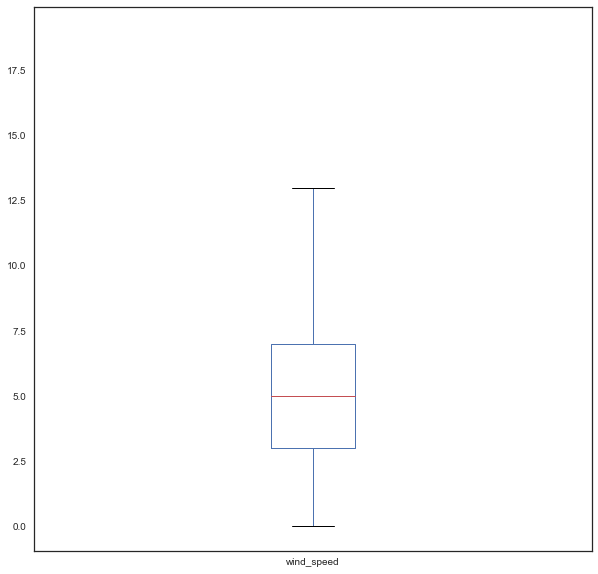

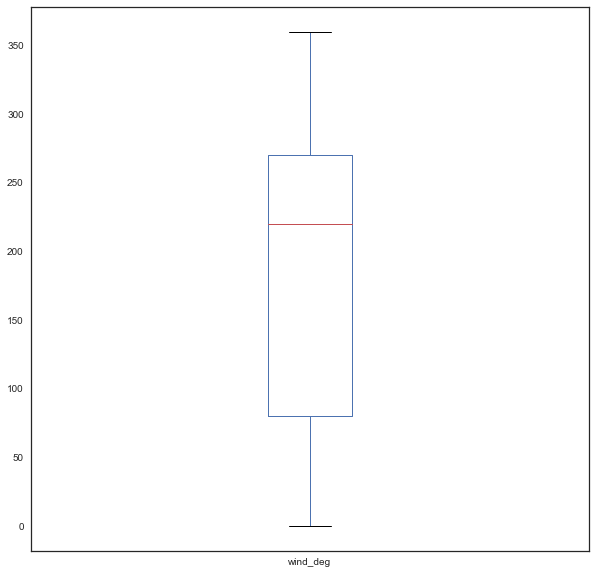

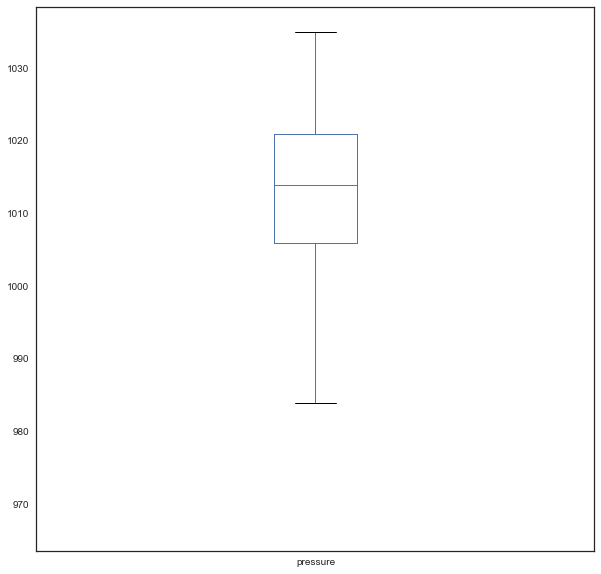

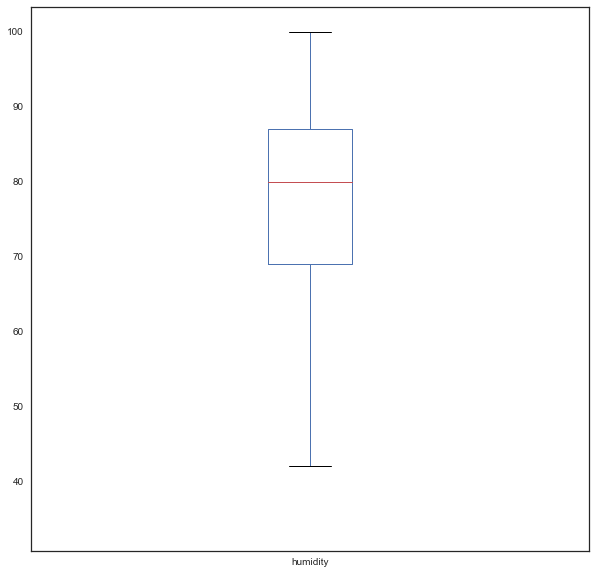

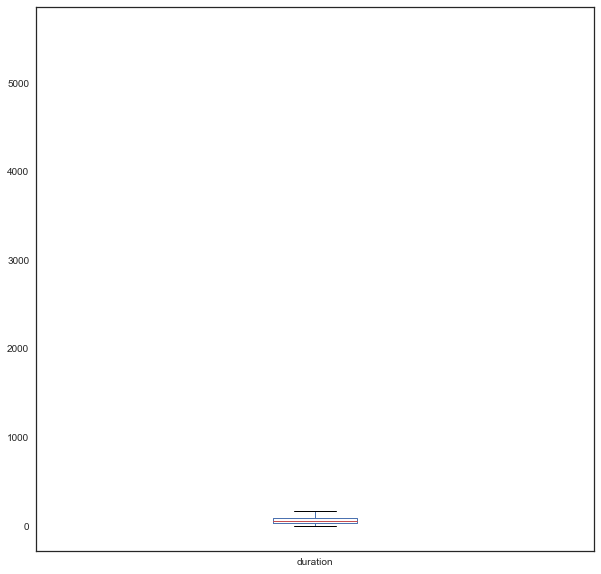

In [90]:
for col in  continuous:
    f = route46A[col].plot(kind='box', figsize=(10,10))
    plt.show()

route46A['duration'].plot(kind='box', figsize=(10,10))

## 1.3 Bar plots for all the categorical features

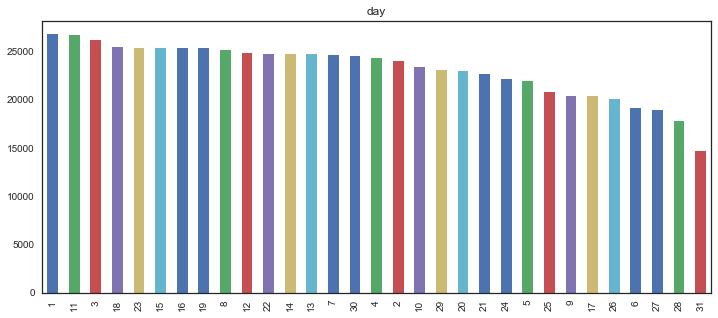

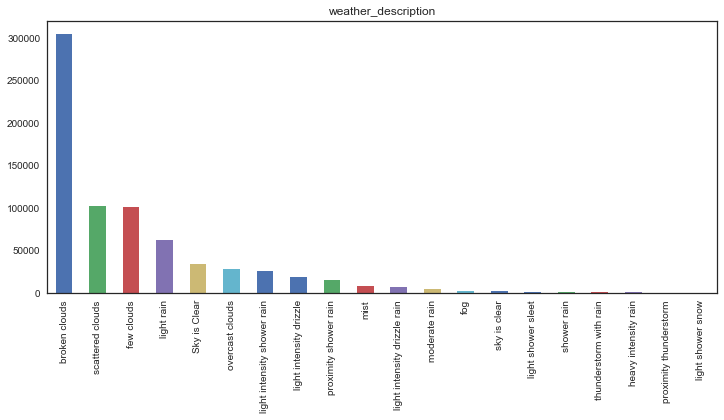

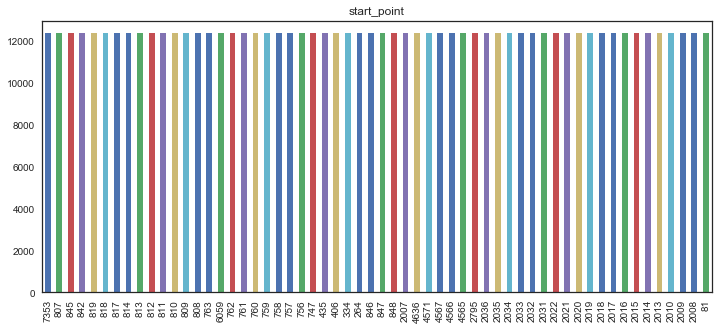

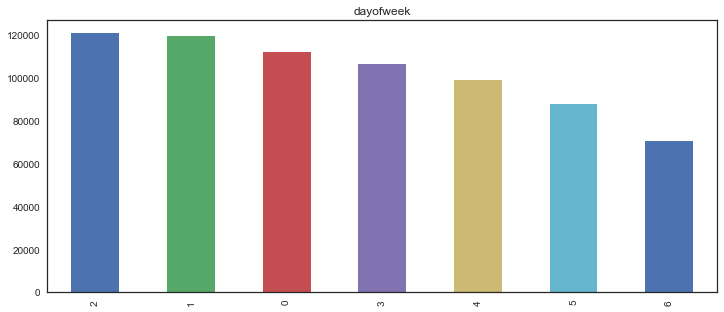

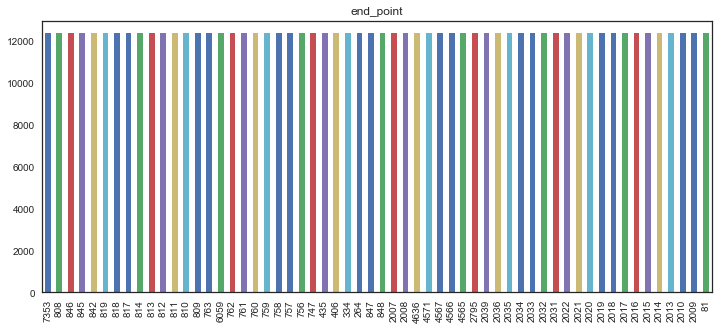

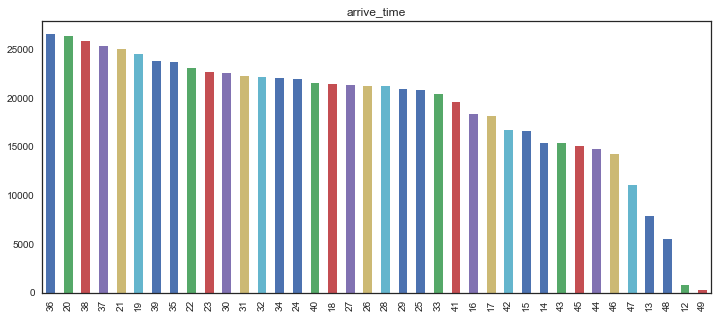

In [91]:
# Plot bar charts for all categorical features and save them in a single PDF file

for column in categorical:
    f = route46A[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    plt.show()

| Day Of Weel   |     Count     |  Mean | Std|Min|25%|50%|75%|Max|
|----------|:-------------:|------:|------:|------:|------:|------:|------:|------:|
| Monday | 144794  | 77.59 |87|0|38|58|93|5578|
| Tuesday |    141898   |   78.76 |83.26|0|38|59|95|3441|
| Wednesday | 131955 |  80.69 |95.1|0|39|60|96|8815|
| Thursday | 128473 |  80.34 |100.93|1|38|59|94|9724|
| Friday | 104594 |  71.67|94.72|0|35|53|83|8815|
| Saturday | 131955 |  80.69 |95.1|0|39|60|96|12697|
| Sunday | 84767 |  67 |87|-1078|33|51|78|6047|

## 1.4 Outliers

From the box plot we can see that there are lots of outliers in target value duration column. Here list some outliers.

In [92]:
sort_by_duation = route46A.sort_values(by='duration',ascending=False)
outliers = sort_by_duation.loc[sort_by_duation['duration'] > 500]
outliers

,arrive_time,clouds_all,day,dayofweek,dt,duration,end_point,humidity,month,pressure,start_point,temp,tripid,weather_description,wind_deg,wind_speed
212810,16,20.0,29,1,1459237617,5578.0,817,100.0,3,995.0,81,276.150,2895037.0,few clouds,230.0,7.0
525885,27,75.0,9,0,1462801304,2657.0,2039,71.0,5,1010.0,2036,287.150,3027372.0,light intensity shower rain,90.0,4.0
499959,19,75.0,1,6,1462095539,2488.0,2039,81.0,5,1019.0,2036,284.980,3034247.0,broken clouds,220.0,8.0
523333,16,75.0,1,4,1459496947,2223.0,2039,75.0,4,1009.0,2036,280.150,2905792.0,light rain,170.0,6.0
323929,31,90.0,18,4,1458315253,2222.0,2039,87.0,3,1028.0,2036,279.150,2910817.0,overcast clouds,20.0,4.0
641247,14,75.0,28,1,1467097037,2215.0,2039,81.0,6,1014.0,2036,285.150,3276748.0,broken clouds,180.0,3.0
168837,17,20.0,24,2,1456302458,2201.0,2039,100.0,2,1020.0,2036,270.150,2876140.0,few clouds,270.0,4.0
211989,18,20.0,29,1,1459242849,2118.0,2039,100.0,3,996.0,2036,279.150,2909902.0,few clouds,210.0,6.0
379609,35,90.0,30,5,1454174640,1988.0,2039,100.0,1,1007.0,2036,276.150,2781676.0,overcast clouds,240.0,6.0
635273,17,40.0,30,2,1459327351,1961.0,2039,86.0,3,1004.0,2036,276.150,2895037.0,scattered clouds,250.0,6.0


It shows that the outliers is very crazy. The biggest one takes 5,578 seconds from stop 81 to stop 817.

In [93]:
route46A = route46A[route46A.duration < 500]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

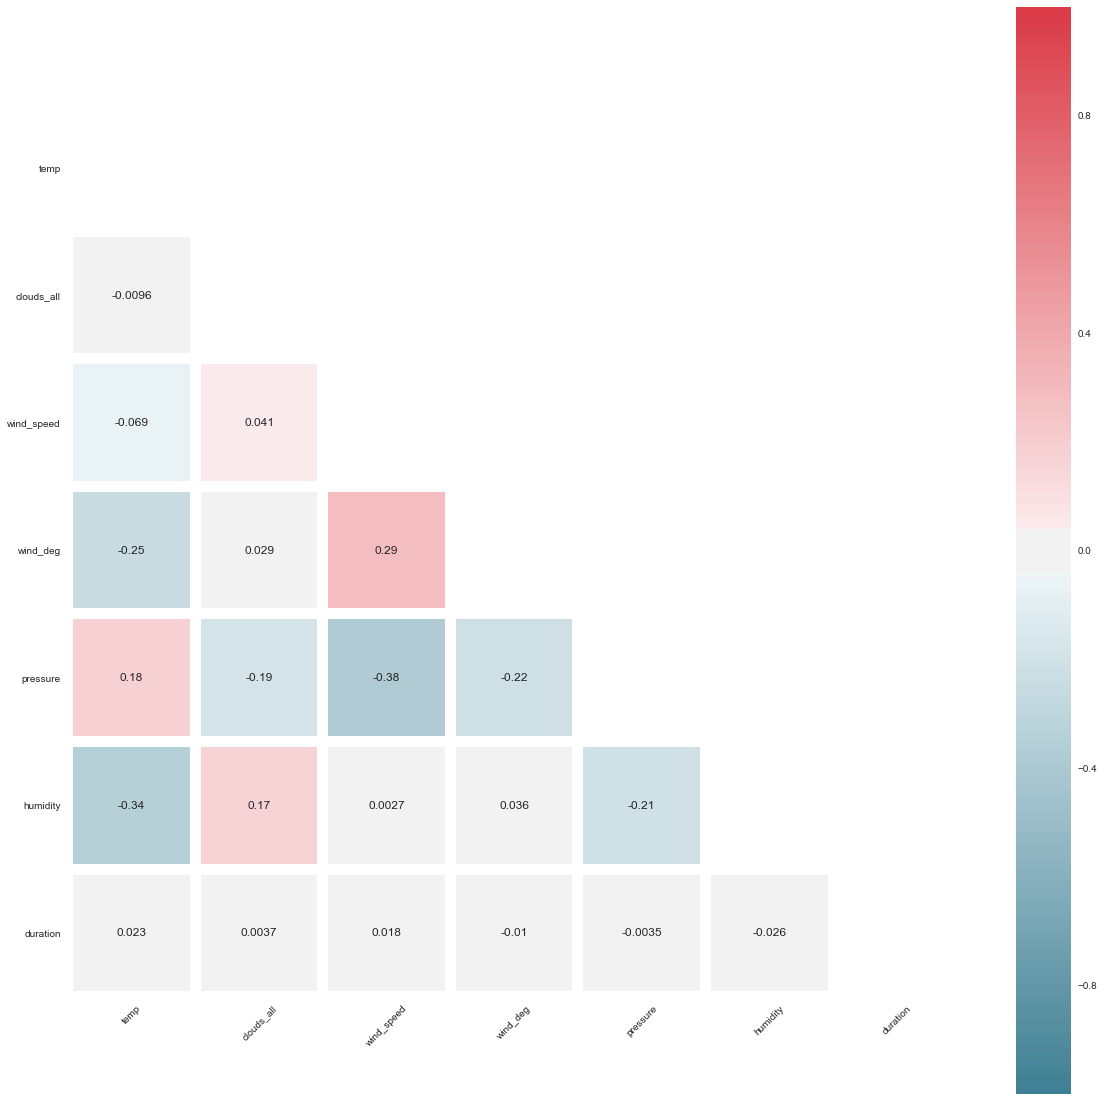

In [94]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html


sns.set(style='white')

# Calculate correlation of all pairs of continuous features
corr = route46A[continuous + ['duration']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, square=True, xticklabels=True, yticklabels=True, linewidths=10, cbar_kws={"shrink":1}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [95]:
# Binary Coding of endstop
binary_end_stop = pd.get_dummies(route46A['end_point'],  prefix='end_stop')
# Binary Coding of startstop
binary_start_stop = pd.get_dummies(route46A['start_point'], prefix='start_stop')
# Binary Coding of dayofweek
binary_dayofweek = pd.get_dummies(route46A['dayofweek'], prefix='dayofweek')

df_continouos = route46A[continuous]


# #Binary Coding of arrive time
binary_arrivetime = pd.get_dummies(route46A['arrive_time'],prefix='arrivetime')

df = pd.concat([df_continouos,  binary_end_stop, binary_start_stop, binary_dayofweek, binary_arrivetime], axis=1)
df.head()

,temp,clouds_all,wind_speed,wind_deg,pressure,humidity,end_stop_81,end_stop_264,end_stop_334,end_stop_406,...,arrivetime_40,arrivetime_41,arrivetime_42,arrivetime_43,arrivetime_44,arrivetime_45,arrivetime_46,arrivetime_47,arrivetime_48,arrivetime_49
0,287.67,20.0,6.0,80.0,1022.0,67.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,287.67,20.0,6.0,80.0,1022.0,67.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,287.67,20.0,6.0,80.0,1022.0,67.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,287.67,20.0,6.0,80.0,1022.0,67.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,287.67,20.0,6.0,80.0,1022.0,67.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
total_rows = df.shape[0]
train_rows = int(total_rows * 0.7)
test_rows = int(total_rows * 0.3)

df_new = pd.concat([df, route46A['duration']], axis=1)
df_new = df_new.sample(frac=1)
df_train = df_new.head(train_rows)
df_test = df_new.tail(test_rows)
df_train.head()

,temp,clouds_all,wind_speed,wind_deg,pressure,humidity,end_stop_81,end_stop_264,end_stop_334,end_stop_406,...,arrivetime_41,arrivetime_42,arrivetime_43,arrivetime_44,arrivetime_45,arrivetime_46,arrivetime_47,arrivetime_48,arrivetime_49,duration
452481,280.15,75.0,8.0,270.0,1026.0,65.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80.0
492876,278.15,75.0,10.0,220.0,972.0,86.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,28.0
561400,280.15,75.0,12.0,260.0,1003.0,98.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,81.0
339539,278.15,75.0,2.0,300.0,1017.0,86.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,53.0
376726,288.71,88.0,3.0,240.0,1013.0,77.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.0


In [98]:
# Out put the columns to a file
column_seq = df.columns.tolist()
column_seq 

['temp',
 'clouds_all',
 'wind_speed',
 'wind_deg',
 'pressure',
 'humidity',
 'end_stop_81',
 'end_stop_264',
 'end_stop_334',
 'end_stop_406',
 'end_stop_435',
 'end_stop_747',
 'end_stop_756',
 'end_stop_757',
 'end_stop_758',
 'end_stop_759',
 'end_stop_760',
 'end_stop_761',
 'end_stop_762',
 'end_stop_763',
 'end_stop_808',
 'end_stop_809',
 'end_stop_810',
 'end_stop_811',
 'end_stop_812',
 'end_stop_813',
 'end_stop_814',
 'end_stop_817',
 'end_stop_818',
 'end_stop_819',
 'end_stop_842',
 'end_stop_845',
 'end_stop_846',
 'end_stop_847',
 'end_stop_848',
 'end_stop_2007',
 'end_stop_2008',
 'end_stop_2009',
 'end_stop_2010',
 'end_stop_2013',
 'end_stop_2014',
 'end_stop_2015',
 'end_stop_2016',
 'end_stop_2017',
 'end_stop_2018',
 'end_stop_2019',
 'end_stop_2020',
 'end_stop_2021',
 'end_stop_2022',
 'end_stop_2031',
 'end_stop_2032',
 'end_stop_2033',
 'end_stop_2034',
 'end_stop_2035',
 'end_stop_2036',
 'end_stop_2039',
 'end_stop_2795',
 'end_stop_4565',
 'end_stop_4566'

In [104]:
pd.DataFrame(data=column_seq, columns=['46A'] ).to_csv('46A.csv', index_label='id')

In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df_train.drop('duration', axis = 1)
y = df_train['duration']

model = model.fit(X, y)

In [106]:
model.score(X, y)

0.5749450671970195

In [138]:
pd.set_option('display.max_columns', 167)
print(X.head(1))

          temp  clouds_all  wind_speed  wind_deg  pressure  humidity  \
452481  280.15        75.0         8.0     270.0    1026.0      65.0   

        end_stop_81  end_stop_264  end_stop_334  end_stop_406  end_stop_435  \
452481            0             0             0             0             0   

        end_stop_747  end_stop_756  end_stop_757  end_stop_758  end_stop_759  \
452481             0             0             1             0             0   

        end_stop_760  end_stop_761  end_stop_762  end_stop_763  end_stop_808  \
452481             0             0             0             0             0   

        end_stop_809  end_stop_810  end_stop_811  end_stop_812  end_stop_813  \
452481             0             0             0             0             0   

        end_stop_814  end_stop_817  end_stop_818  end_stop_819  end_stop_842  \
452481             0             0             0             0             0   

        end_stop_845  end_stop_846  end_stop_847  en

In [107]:
test_x = df_test.drop('duration', axis = 1)
test_y = df_test['duration']
model.score(test_x, test_y)

0.5752255040015489

In [137]:
model.predict(X)

array([62.93647861, 24.92145634, 87.69938946, ..., 29.97712994,
       47.75548172, 40.6916151 ])

In [18]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=(300,300,300), activation='relu',solver='adam', alpha=0.0001, random_state=1, learning_rate='adaptive', max_iter=300)
clf.fit(X, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 300, 300), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [ ]:
clf.score(X, y)

0.581726511976244

In [ ]:
clf.score(test_x, test_y)

In [122]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0, n_estimators=80, n_jobs=-1, min_samples_split=5)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [123]:
regr.score(X,y)

0.83541027718443

In [124]:
regr.score(test_x,test_y)

0.5909756366554586

In [127]:
from sklearn.externals import joblib
joblib.dump(model, 'route46a.pkl') 

['route46a.pkl']